# 案例：配对交易聚类

在本案例研究中，我们将使用聚类方法进行配对交易策略的设计。

配对交易策略是一种利用两种或多种相关性较高的金融资产之间的价格差异来进行交易的策略。聚类方法可以用来识别这些相关性较高的资产，并帮助设计配对交易策略。

```{admonition} 小组讨论 
:class: note
1.两种相关性较高的金融资产，如何设计交易策略（交易规则），并获得盈利？
<br>2.如何在一个金融资产池中，简单快速得识别出哪些相关性较高？
<br>3.使用聚类算法，可以解决第2个问题么？
<br>分小组讨论后，在链接中回答以上问题：<a href="https://docs.qq.com/form/page/DWmJna2FoT3dzRWJp" target="_blank"> 
https://docs.qq.com/form/page/DWmJna2FoT3dzRWJp </a> 

```

# 1. 问题定义

在这个案例研究中，我们的目标是对标准普尔 500 指数的股票进行聚类分析，以识别相关性较高的股票，并为配对交易策略找出配对股票。下面是实现这个目标的一般步骤：

1. **数据收集**：收集标准普尔 500 指数成分股的历史价格数据。这些数据通常可以从金融数据供应商、财经网站或API获取。

2. **数据预处理**：对收集到的历史价格数据进行预处理，包括缺失值处理、异常值处理等。

3. **特征工程**：从历史价格数据中提取特征，例如价格变化率、波动率等，以便进行聚类分析。

4. **标准化处理**：对提取的特征进行标准化处理，确保它们具有相似的尺度。

5. **聚类分析**：使用聚类算法对标准化后的数据进行聚类分析，以识别相关性较高的股票。

6. **配对股票选择**：根据聚类结果，选择属于同一簇或不同簇但具有相关性较高的股票作为配对股票。

在实施这个案例研究时，需要使用适当的工具和技术来处理和分析数据，例如Python中的pandas、scikit-learn和其他相关库。


# 2. 载入数据

通过wind或其他数据源，下载标普500的成分股及其每日的收盘价，保存为CSV格式，然后读取。

In [2]:
import pandas as pd
dataset = pd.read_csv('datasets/SP500Data.csv',index_col=0)
dataset.head(5)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998


数据的形状为

In [3]:
dataset.shape

(448, 502)

In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. 探索性数据分析

探索性数据分析（Exploratory Data Analysis，简称EDA）是数据分析过程中的一个重要步骤，通过可视化和统计方法来探索数据的特征、结构和规律。

### 3.1 描述性统计

In [5]:
dataset.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,70.934196,88.078013,307.303839,167.473750,59.630804,252.270603,21.804754,147.501428,14.534888,128.423750,...,165.139486,139.475335,51.671027,29.151071,90.774487,74.549040,93.492455,120.406161,49.230245,94.787232
std,9.015754,13.480891,71.989893,14.635497,13.119012,29.001055,7.425020,21.095302,2.266254,38.573308,...,17.383970,29.251895,6.650626,3.450413,21.081242,4.926937,11.958700,9.199975,4.820335,14.395919
min,56.270000,62.980000,159.309998,133.669998,40.110001,177.699997,9.530000,103.760002,10.060000,71.800003,...,134.839996,92.010002,42.130001,18.920000,62.820000,61.380001,76.300003,97.230003,38.509998,71.510002
25%,62.620001,78.657503,260.557487,157.280006,47.037500,235.377495,15.147500,133.307499,12.847500,94.059998,...,151.705002,114.085001,45.689999,27.139999,71.664999,70.547503,83.507502,114.030001,45.107500,84.557499
50%,70.014999,88.524998,301.940002,162.880005,55.269999,254.684998,21.885000,154.949997,14.830000,113.389999,...,158.809998,132.974998,49.370001,29.075000,85.195000,75.165001,89.930000,120.645000,49.184999,90.090000
75%,78.620003,96.667498,368.095001,178.337502,71.565002,272.989990,28.437500,163.614998,16.355000,158.855000,...,178.064999,164.927498,56.715001,31.455000,109.367500,78.359999,101.462500,125.850002,53.214999,101.970001
max,88.739998,123.209999,449.750000,201.119995,83.389999,311.269989,34.389999,184.720001,18.410000,215.759995,...,199.360001,201.509995,65.820000,36.480000,139.720001,84.410004,119.209999,142.610001,58.540001,128.470001


这些数据描述了三个金融资产（ABT、ABBV、ABMD）的描述性统计信息，包括样本数量、均值、标准差、最小值、25%分位数、中位数（50%分位数）、75%分位数和最大值。具体描述如下，例如，对于资产ABT：
- 样本数量为448。
- 均值为70.93，表示样本的平均值。
- 标准差为9.02，反映了样本数据的波动性或分散程度。
- 最小值为56.27，表示样本中的最小观测值。
- 25%分位数为62.62，表示将数据从小到大排序后，位于前25%位置的数值。
- 中位数（50%分位数）为70.01，表示将数据从小到大排序后，位于中间位置的数值。
- 75%分位数为78.62，表示将数据从小到大排序后，位于前75%位置的数值。
- 最大值为88.74，表示样本中的最大观测值。

这些描述性统计信息对于了解每个资产的价格分布和变化情况非常有用。

### 3.2 绘制走势图

随机选择SP500中5个股票进行绘图，观察其表现

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

<Axes: xlabel='Date'>

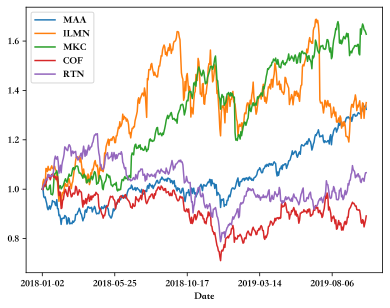

In [66]:
import numpy as np
random_int = np.random.randint(0,dataset.shape[1], 5)
(dataset/dataset.iloc[0]).iloc[:, random_int].plot()

<a id='3'></a>
## 4. 数据预处理

### 4.1. 数据清洗
我们会检查各行中是否存在缺失值（也称空值、NA、 null），要么删除它们，要么用列的平均值来填充它们。

In [67]:
print('Null Values =', dataset.isnull().values.any())

Null Values = False


删除缺失值超过 30% 的列

In [8]:
missing_percent = dataset.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing_percent[missing_percent > 0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(448, 498)

用数据集中的上一个可用值来填补缺失值，也就是用过去的值，来填充未来的缺失位置。

In [9]:
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998


### 4.2. 准备收益率和波动性

为了进行聚类分析，我们将使用年度收益率和方差作为变量，因为它们是股票表现及其波动性的指标。让我们从数据中准备收益率和波动性变量。

计算在理论上的一年期间的平均年百分比收益率和波动率。

In [10]:

returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns

将数据格式化为一个 numpy 数组，以便输入到 K-Means 算法中。

在应用聚类之前，所有变量应该在相同的尺度上，否则具有较大值的特征会主导结果。我们使用 sklearn 中的 StandardScaler 将数据集的特征标准化到单位尺度上（均值 = 0，方差 = 1），即对每个特征的每个值减去该特征的均值，然后除以该特征的标准差。标准化处理公式如下：


$$
x'_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

其中，$x'_{ij}$ 是标准化后的第 $i$ 个样本在第 $j$ 个特征上的取值。

标准化后的数据具有零均值和单位方差，有助于许多机器学习算法更好地收敛和提高模型性能。

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)

In [12]:
X=rescaledDataset
X.head(2)

,Returns,Volatility
ABT,0.794067,-0.702741
ABBV,-0.927603,0.794867


<a id='4'></a>
# 5. 评估算法和模型

<a id='5.1'></a>
## 5.1. K-Means 聚类


<a id='5.1.2'></a>
### 5.1 聚类和可视化

让我们使用六个聚类构建 K-Means 模型，并可视化结果。

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0)
model.fit(X)
centers_init = model.cluster_centers_

提取标签

In [15]:
target_labels = model.predict(X)

当数据集中的变量/维度非常多时，要可视化聚类形成的方式并不容易。其中一种方法是在二维空间中可视化聚类。

In [22]:
centroids = model.cluster_centers_

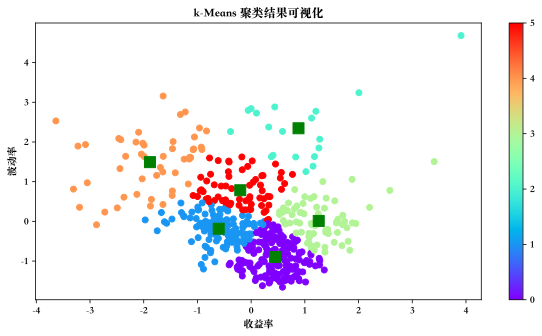

In [70]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],
                     X.iloc[:,1],
                     c = model.labels_,
                     cmap ="rainbow",
                     label = X.index)
ax.set_title('k-Means 聚类结果可视化')
ax.set_xlabel('收益率')
ax.set_ylabel('波动率')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

聚类后，查看每个类别中的个数

In [71]:
clustered_series = pd.Series(index=X.index, data=model.labels_.flatten())
clustered_series

ABT     0
ABBV    5
ABMD    2
ACN     0
ATVI    5
       ..
XYL     0
YUM     0
ZBH     0
ZION    1
ZTS     3
Length: 498, dtype: int32

In [109]:
clustered_series.value_counts()

0    167
1    123
3     71
5     69
4     49
2     19
Name: count, dtype: int64

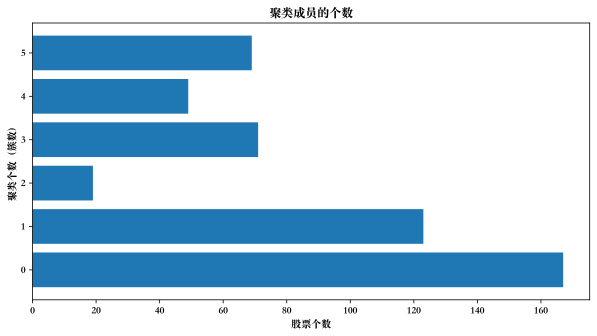

In [112]:
plt.figure(figsize=(10,5))
clustered_count = clustered_series.value_counts()
plt.barh(clustered_count.index, clustered_count.values)
plt.title('聚类成员的个数')
plt.xlabel('股票个数')
plt.ylabel('聚类个数（簇数）')
plt.show()

每个聚类中的股票数量大约在20到160之间。虽然分布不均匀，但每个聚类中都有相当数量的股票。

观察簇2中的股票的走势

In [113]:
clust = 2
tickers =list(clustered_series[clustered_series==clust].index)
print('簇:%s 包含的股票数：%s' %(clust, len(tickers)))

簇:2 包含的股票数：19


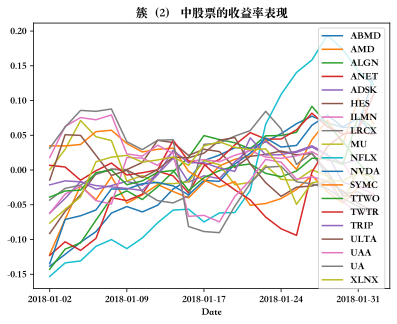

In [114]:
means = np.log(dataset.loc[:"2018-02-01", tickers].mean()) 
data = np.log(dataset.loc[:"2018-02-01",tickers]).sub(means)
data.plot(title='簇（%d） 中股票的收益率表现' % clust)
plt.show()

从上面的图表来看，在所有具有少量股票的聚类中，我们看到不同聚类下的股票有着相似的运动，这证实了聚类技术的有效性。

<a id='6'></a>
# 6. 配对选择

一旦创建了聚类，可以在聚类内的股票上应用多种基于协整的统计技术来创建配对。如果两个或多个时间序列是非平稳的并且趋向于一起移动，那么它们被认为是协整的。通过几种统计技术，包括Augmented Dickey-Fuller test 和 the Johansen test，可以验证时间序列之间的协整性。

在这一步中，我们扫描聚类内的证券列表，并测试配对之间的协整性。首先，我们编写一个函数，返回一个协整性测试分数矩阵、一个 p 值矩阵，以及任何 p 值小于 0.05 的配对

### 6.1. 协整和配对选择函数

在配对交易策略中，协整股票对是指两个股票之间存在长期稳定的关系，可以通过统计学方法进行检验。协整关系通常被认为是一种市场中的均衡关系，可以用来识别配对交易机会。

In [118]:
def find_cointegrated_pairs(data, significance=0.05):
    """
    寻找协整股票对（cointegrated pairs）的函数
    函数来自 https://www.quantopian.com/lectures/introduction-to-pairs-trading
    输入参数：
        data：包含多个时间序列数据的 DataFrame，每列代表一个股票的价格数据。
        significance：协整检验的显著性水平，默认为0.05。
    输出：
        score_matrix：协整检验的统计量矩阵，记录了所有股票之间的协整检验统计量。
        pvalue_matrix：协整检验的 p 值矩阵，记录了所有股票之间的协整检验的 p 值。
        pairs：找到的协整股票对的列表，每个元素是一个元组，包含两个股票的名称。
    """

    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

对聚类结果中的每个簇中的股票进行协整性分析，并将结果存储在 cluster_dict 字典中

In [119]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        dataset[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [120]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [121]:
print ("发现配对对数: %d" % len(pairs))
print ("包含股票数量: %d" % len(np.unique(pairs)))

发现配对对数: 41
包含股票数量: 46


In [122]:
pairs

[('ABT', 'AEE'),
 ('ABT', 'AEP'),
 ('ABT', 'AWK'),
 ('ABT', 'AON'),
 ('ABT', 'AIV'),
 ('ABT', 'AJG'),
 ('ABT', 'ATO'),
 ('ABT', 'AVB'),
 ('ABT', 'CMS'),
 ('ABT', 'ED'),
 ('ABT', 'COO'),
 ('ABT', 'DTE'),
 ('ABT', 'FRT'),
 ('ABT', 'HCP'),
 ('ABT', 'HOLX'),
 ('ABT', 'KMB'),
 ('ABT', 'MCD'),
 ('ABT', 'NI'),
 ('ABT', 'PNW'),
 ('ABT', 'PG'),
 ('ABT', 'PEG'),
 ('ABT', 'REG'),
 ('ABT', 'RSG'),
 ('ABT', 'TMUS'),
 ('ABT', 'UDR'),
 ('ABT', 'VTR'),
 ('ABT', 'WELL'),
 ('ABT', 'XEL'),
 ('A', 'WAT'),
 ('ADBE', 'ADI'),
 ('ADBE', 'AZO'),
 ('ADBE', 'CDNS'),
 ('ADBE', 'CMG'),
 ('ADBE', 'ROST'),
 ('ADBE', 'TSCO'),
 ('ADBE', 'VFC'),
 ('ABBV', 'BWA'),
 ('AMG', 'AAL'),
 ('AMG', 'DD'),
 ('AMG', 'FCX'),
 ('AMG', 'NLSN')]

### 6.2. 配对可视化

让我们现在可视化配对选择过程的结果。

下图显示了 K-Means 在发现非传统配对方面的强度（在可视化中用箭头指出）。DXC 是 DXC Technology 的股票代码，XEC 是 Cimarex Energy 的股票代码。这两支股票来自不同的行业，在表面上看似乎没有共同之处，但它们被识别为配对，使用了 K-Means 聚类和协整性测试。这意味着它们之间的股价走势存在长期稳定的关系。

In [40]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [41]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

使用了 t-SNE 算法对给定的数据集 X_pairs 进行降维，并将降维后的结果保存在 X_tsne 中

In [42]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

绘制 t-SNE 降维结果的可视化图形，其中包括了协整股票对的连接线和散点图

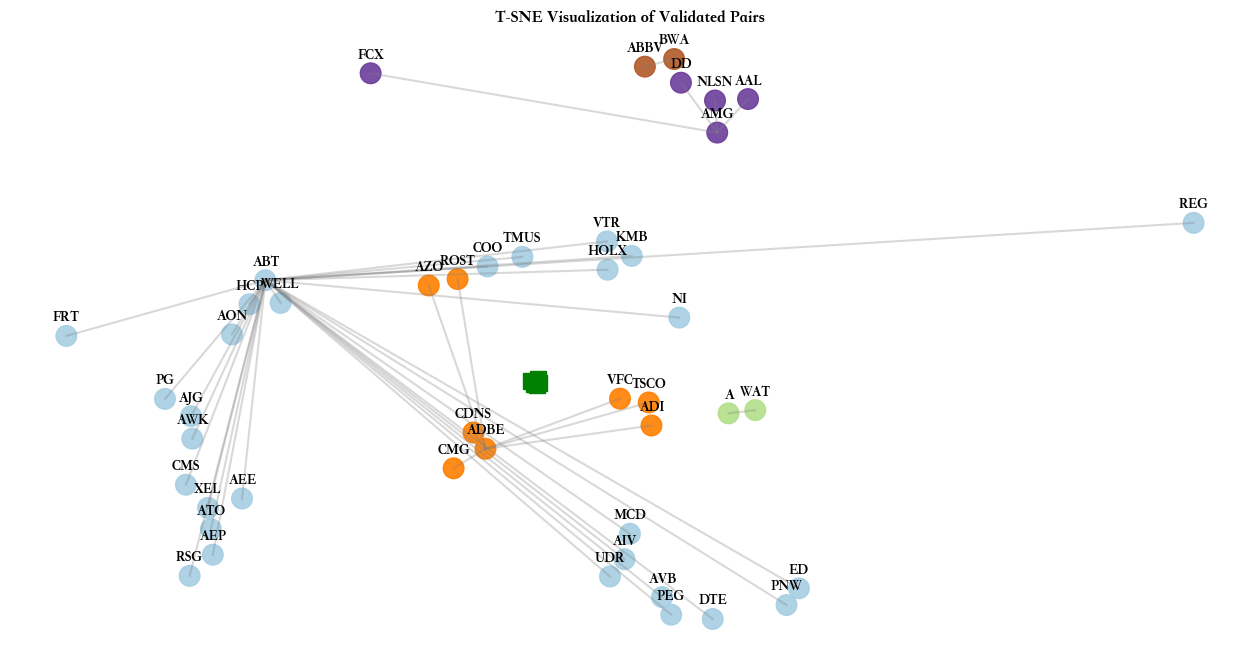

In [43]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)


一旦配对形成，它们就可以用于配对交易策略。当配对的股票价格偏离了确定的长期关系时，投资者会寻求在表现不佳的证券中建立多头头寸，并卖空表现优异的证券。如果证券回归到它们的历史关系，那么从价格的收敛中获利。

## 7. **结论**

聚类技术并不直接帮助股票趋势预测。然而，它们可以在投资组合构建中有效地用于找到合适的配对，最终有助于风险缓解，并且可以实现更优秀的风险调整回报。

聚类可以有效地用于将股票划分为具有“相似特征”的组，用于许多其他类型的交易策略，并且可以帮助投资组合构建，以确保我们选择了一个具有足够分散性的股票池。